# TENSORFLOW

* It is a deep learning or numerical computing library.
* It is used to build deep learning and neural network models to gain insights out of unstructured data.
* It allows us to check and evaluate how our network, which is another form of machine learning model, is doing. Is it getting things right or is it getting things wrong?

## Why TensorFlow?

* Write fast deep learning code in Python (able to run on a GPU).
* Able to access many pre-built deep learning models.
* Whole stack: preprocess, model, deploy.

# What is Deep Learning? What are Neural Networks?

* A Neural Network is a computational model inspired by the human brain.
* It consists of layer of small computing uints called neurons.

* Deep Learning is a subfield of Machine Learning (ML) that uses neural networks with many layers to learn patterns from large amounts of data.

## What are the types of Deep Learning ?

🔥 Types of Deep Learning

Deep Learning can be categorized into 3 major groups:

### 1. Based on Learning Style

✅ 1.1 Supervised Deep Learning

Model learns from labeled data (inputs + correct outputs).

Examples:

* Image classification

* Spam detection

* Sentiment analysis

* Face recognition

Common architectures: CNN, RNN, Transformers, MLP

✅ 1.2 Unsupervised Deep Learning

Model learns patterns without labels.

Examples:

* Clustering

* Feature extraction

* Anomaly detection

* Common architectures:

* Autoencoders

* Variational Autoencoders (VAE)

* Generative Adversarial Networks (GANs)

✅ 1.3 Semi-Supervised Deep Learning

Combination of labeled + large unlabeled data.

Used in domains where labels are costly (medical imaging).

✅ 1.4 Reinforcement Learning (RL) + Deep Learning → Deep RL

Agent learns by interacting with an environment and receiving rewards.

Used in:

* Robotics

* Self-driving cars

* Game-playing AI (AlphaGo)

* Autonomous systems

#### 2. Based on Neural Network Architecture

🔹 2.1 Convolutional Neural Networks (CNNs)

Used for:

* Images

* Videos

* Object detection

* Medical imaging

Examples: ResNet, VGG, MobileNet

🔹 2.2 Recurrent Neural Networks (RNNs)

Used for sequence-based data:

* Text

* Speech

* Time-series

* Variants:

* LSTM

* GRU

* Bi-LSTM

🔹 2.3 Transformers

The most powerful modern deep learning architecture.

Used in:

* ChatGPT

* Translation

* Speech

* Image understanding (Vision Transformers)

Examples: BERT, GPT, T5

🔹 2.4 Autoencoders

Used for:

* Dimensionality reduction

* Noise removal

* Feature extraction

🔹 2.5 Generative Models

Used to generate new data:

* Images

* Text

* Music

* Types:

* GANs

* VAEs

* Diffusion Models (used in Midjourney, DALL·E)

🔹 2.6 Graph Neural Networks (GNNs)

Used for graph-structured data:

* Social networks

* Fraud detection

* Molecule prediction

🔹 2.7 Deep Belief Networks (DBN)

Old architecture, rarely used today.

3. Based on Task
🟦 Computer Vision Deep Learning

Uses CNNs, Transformers.

🟩 NLP (Natural Language Processing) Deep Learning

Uses RNNs, LSTMs, Transformers.

🟨 Speech Deep Learning

Uses RNNs, CNNs, Transformers.

🟧 Generative Deep Learning

Uses GANs, VAEs, Diffusion models.


## What is tranfer learning ? Why use transfer learning?

* Take what you know in one domain and apply it to another .
* Starting from scratch can be expensive and time consuming.
* Why not take advantage of what's already out there?

## What are we going to cover?

* An end-to-end multi-class calssification workflow with TensorFlow.
* Preprocessing image data (getting it into Tensors).
* Choosing a deep learning model.
* Fitting a model to the data (learning patterns).
* Making predictions with a model (using patterns).
* Evaluating model predictions.
* Saving and loading models.
* Using a trained model to make predictions on custom data.

# 🐕 End-to-End Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When i'm sitting at the cafe and I take a photo of a dog , I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evalutaion

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.

* There are 120 breeds of a dogs (this means there are 120 different classes).

* There are around 10,000+ images in the training set (these images have labels).

* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

Getting our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅

In [ ]:
# Import necessary tools
import tensorflow_hub as hub
import tensorflow as tf
print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

# Check for GPU availablity
print("GPU","available (YES!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF Version: 2.19.0
TF Hub Version: 0.16.1
GPU not available :(


## Getting our datas ready  (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we''be  doing first. Turning our images into Tensors (numerical representations).



Let's start by accessing our data and checking out the labels.

In [ ]:
# Checkout the labels of our data

import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/DOG VISION DATAS/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Lets figure out how many images there are per class(breed) first
labels_csv["breed"].value_counts()


,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
komondor,67
brabancon_griffon,67


<Axes: xlabel='breed'>

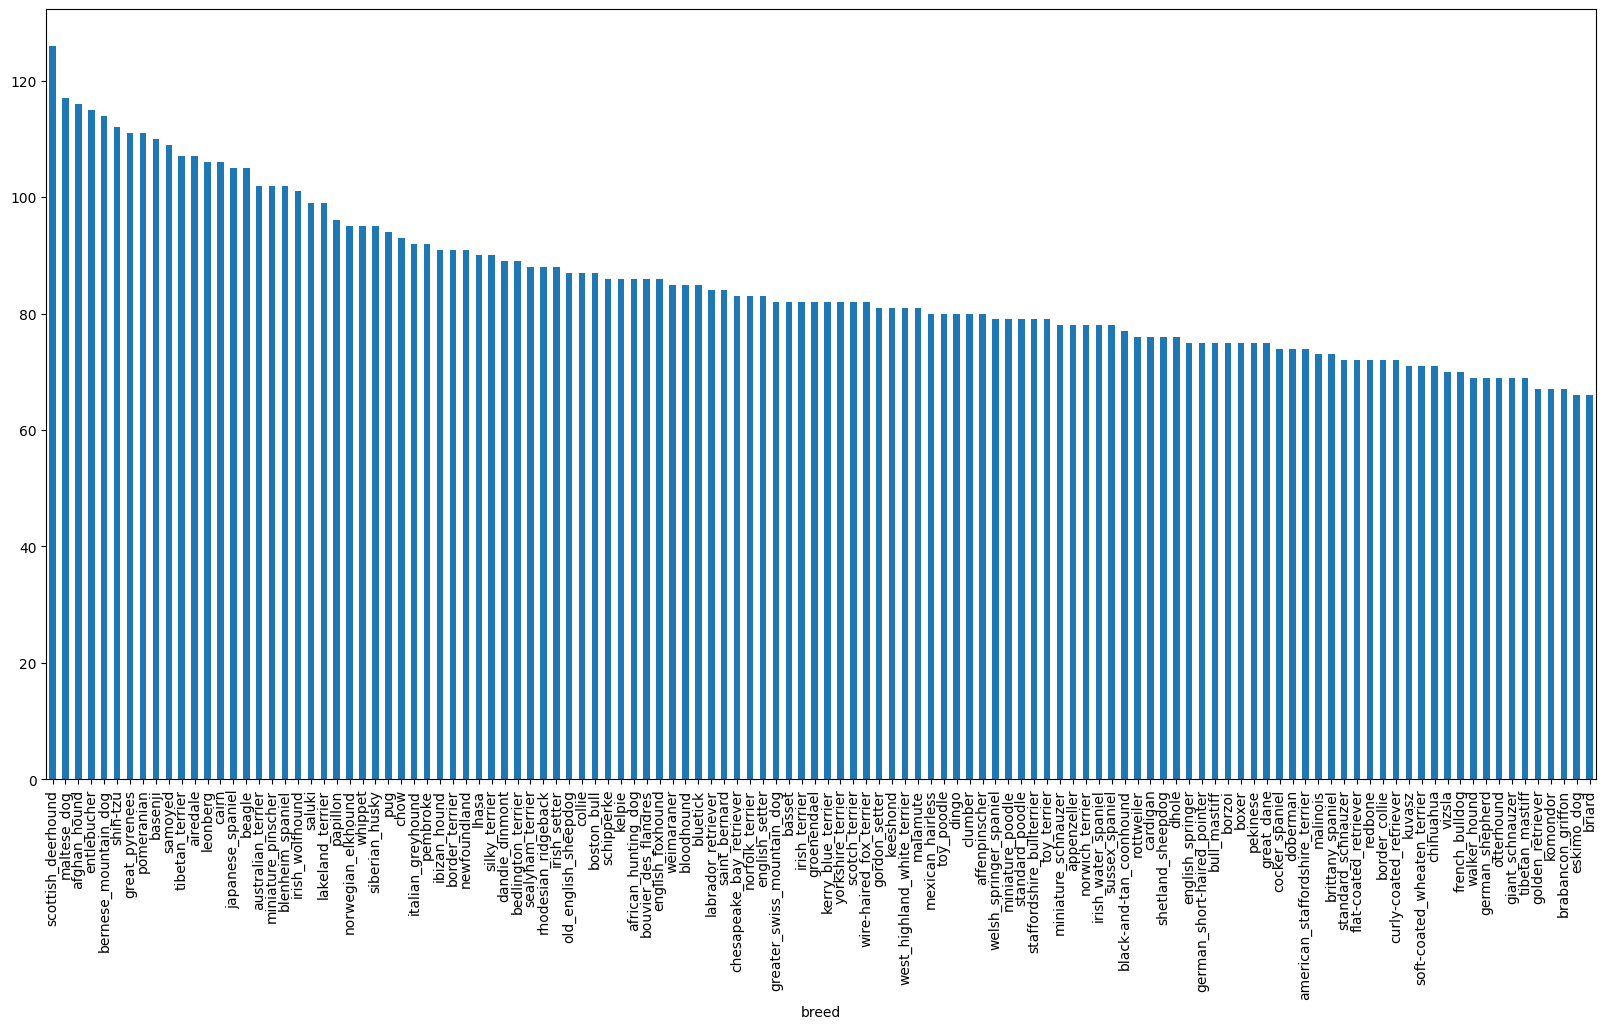

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

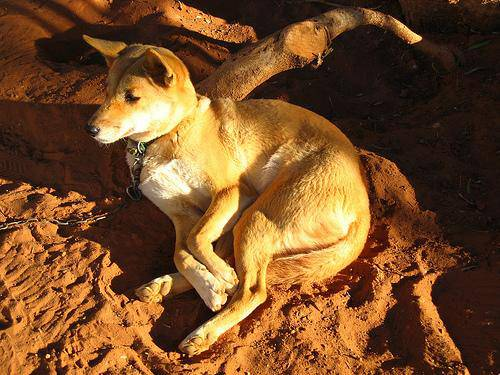

In [ ]:
from tensorflow.python.ops.math_ops import Imag
# Lets view an image
from IPython.display import Image
Image("drive/MyDrive/DOG VISION DATAS/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create path names from image ID's
filename = [fname for fname in labels_csv["id"]]

# Check the first 10
filename[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

So it's create a list of fname for fname , which is short of file name in labels, csv id column, so take this ID column, go through each one of them and take the value and save it to the list.

In [ ]:
filename = ["drive/MyDrive/DOG VISION DATAS/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filename[:10]

['drive/MyDrive/DOG VISION DATAS/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DOG VISION DATAS/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

So now we've got a list of all the file names from the ID column of lable CSV. What we should do is compare them to the number of files in our traning data directory.

Why would we do this?

Well, this is to make sure that we've got the same amount of file names as we do actual files in our traning file.

So now what we will do is that , we will check whether number of file names matched number of actual image files , because otherwise if we just kept going now and we've worked out later on that , hey, we've got some issue with our data, then it's kind of going to undo a lot of the stuff that we've done.

So that's a big point is a lot of machine learing is just basically massaging your data into a form so that it work with machine learning, if that makes sense.

In [ ]:
# Check whether number of filenames matches number of actual image files


# So now we have to check the amount of files in a particular file by using list.
import os
if len(os.listdir("drive/MyDrive/DOG VISION DATAS/train/")) == len(filename):
  print("Filename match actual amount of files !!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filename match actual amount of files !!! Proceed.


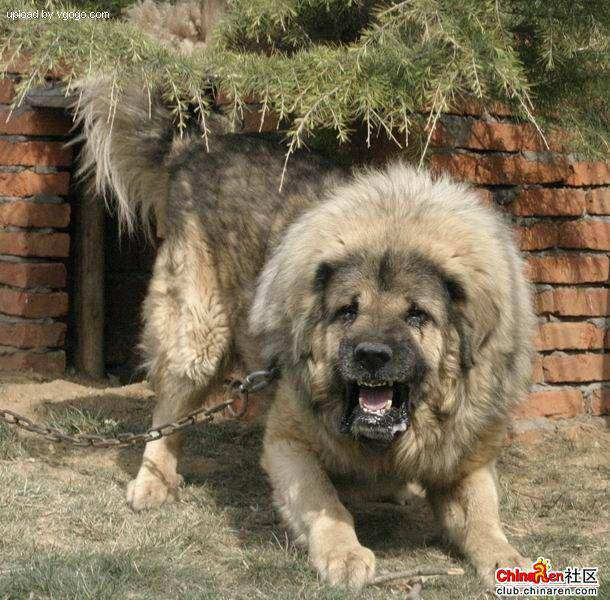

In [ ]:
# One more check
Image(filename[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our traning image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# or you can do this in another way
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# See if number of labels matches the number of filename
if len(labels) == len(filename):
  print("Number of labels matches number of filenames!")
else:
  print("Number of lables does not match number of filenames, check your directories")

Number of labels matches number of filenames!


As machine learning does not understand the strings , so we have to convert the strings into numbers of the datasets. And find the unique label values.

In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
from pandas.core.algorithms import unique
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where (unique_breeds == labels[10])) # index where label occurs
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a I where the sample label occurs

boston_bull
(array([99]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to crete our own.

This is beacause the most important concept in machine leanring is the 3 sets i.e. traning set, validation set adn test set. We have 2 of them , which is traning and test set , but no validation set, that's why we have to create our own validation set.

In [ ]:
# Setup X & y variables
X = filename
y = boolean_labels


We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000,step:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state =42)

len(X_train), len(X_val), len(y_train),len(y_val)

(800, 200, 800, 200)

### Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, 'image'.
3. Turn our 'image' (a jpg) into Tensors.
4. Resize the 'image' to be a shape of (224, 224)
5. Return the modified 'image'.

Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
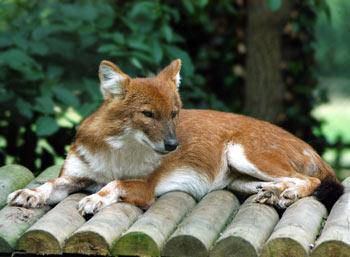

In [ ]:
image

In [ ]:
# Image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

Now we've see what an image looks like as a Tensor , let's make a function to preprocess them.

  1. Take an image filepath as input.
  2. Use TensorFlow to read the file and save it to a variable , image.
  3. Turn our image (a jpg) into Tensors.
  4. Normalize our image (convert color channel values from 0-255 to 0-1).
  5. Resize the image to be a shape of (224,224)
  6. Return the modified image.

Before we do , let's see what importing an image looks like.

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
Image = imread(filename[42])
image.shape

(257, 350, 3)

This is (height,width, colour chanel). {Colour chanel mean (Red,blue, green)}

In [ ]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
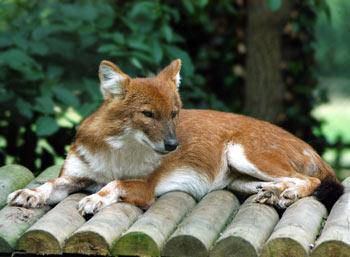

In [ ]:
image

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Take an image file path and turns the image into a Tensor.

  """

# Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


So now we've got a function to pre process our images that is turn them into tensors. We can now start to figure out what we need to do next?

So we've got data ready , turn it into tensors adn then pick a model. But the thing is that we're not quite up to this. This is because TensorFlow likes to see things in the form of a data batch ( THE SMALL PORTION THE DATA). The batch size should be 32.

So know what we have to do is that we're going to transform our data into batches of size 32, so that they can process realy efficietly in TensorFlow.
So lets make a heading :-

## Turning our data into batches

Why it's important to turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory. So if we have 10,000+ images and we're trying the patterns on that in one go ,that may be more than 8 gb , which is going to slow down our training process.

That's the reason we have to break everything in 32 (batch size) at a time .

In oder to use TensorFlow effectively , we need our data in the form of Tensor tuples which look like this:
'(image,label)' as paires.

So we ahve to pass 32 images at a time to our machine learning model and it would figure out the patterns in this image that relate to this label, and then it would end up doing that in a sort of loop fashion until it gets through all 10,000 plus images.



Let's build some functionality . But first we need a way to get tuples. So we need before we can turn them into batches of 32, we need to get a tuple that looks like this (image,label).

In [ ]:
# Create a simple function to return a tuple (image,label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a typle of (image , label).
  """
  image = process_image(image_path)
  return image,label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Alright , this work perfectly. SO now what we have to do is that , we have turn all the datas into tuples of tensors in the form of (image, labels). We need a way to turn all of our data so our X AND Y , our data and labels into batches of size 32.

Let's make a function to turn all of our data ('X' & 'y') into batches!

Because we'll be deealing with 3 different sets of data (training, validation,test) we will make sure the function can accomodate for each set.

We'll set a default size 32.

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE,
                        valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it
  if it's validation data. Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Look at that! WE'VE got our data in batches, more specifically , they're in Tensor pairs of (images, labels) ready for use on a GPU.

But having our data in batches can be a bit of hard concept to understand . Let's build a function which help us visualize what's going on under the hood.

## Visualizing Data Batches

Our data is now in batches , however , these can be a little hard to understand / comprehend .let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))

  # Loop through 25 (for displaying 25 images)
  for i in range(25):

    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)

    # Display an image
    plt.imshow(images[i])

    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])

    # Turn gird lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the as_numpy_iterator() method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to next() will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

#### Note: Running the cell below and loading images may take a little while.

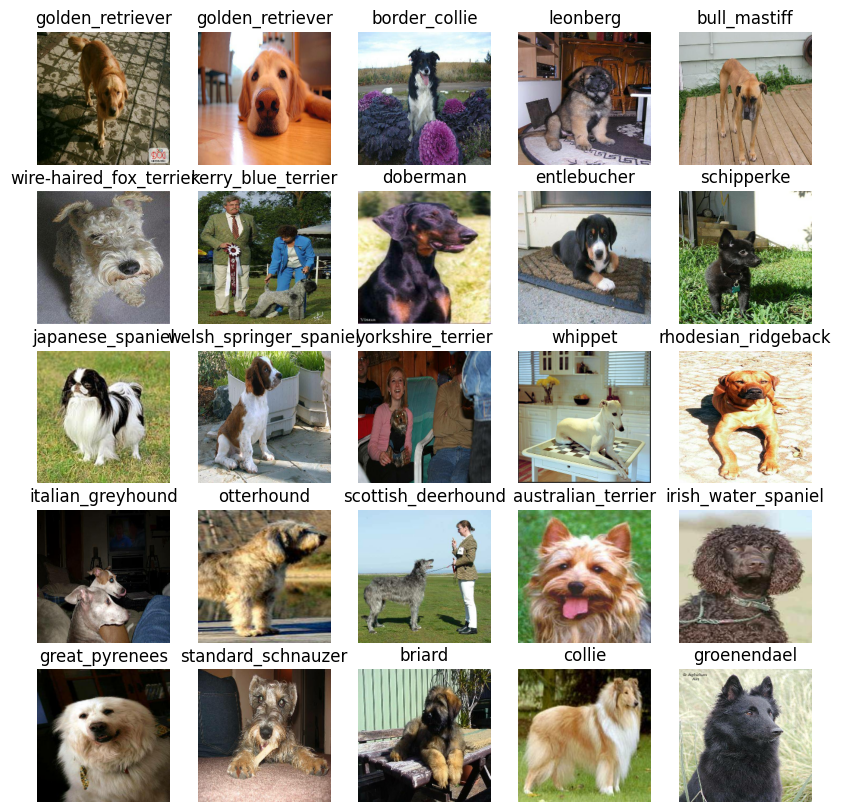

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

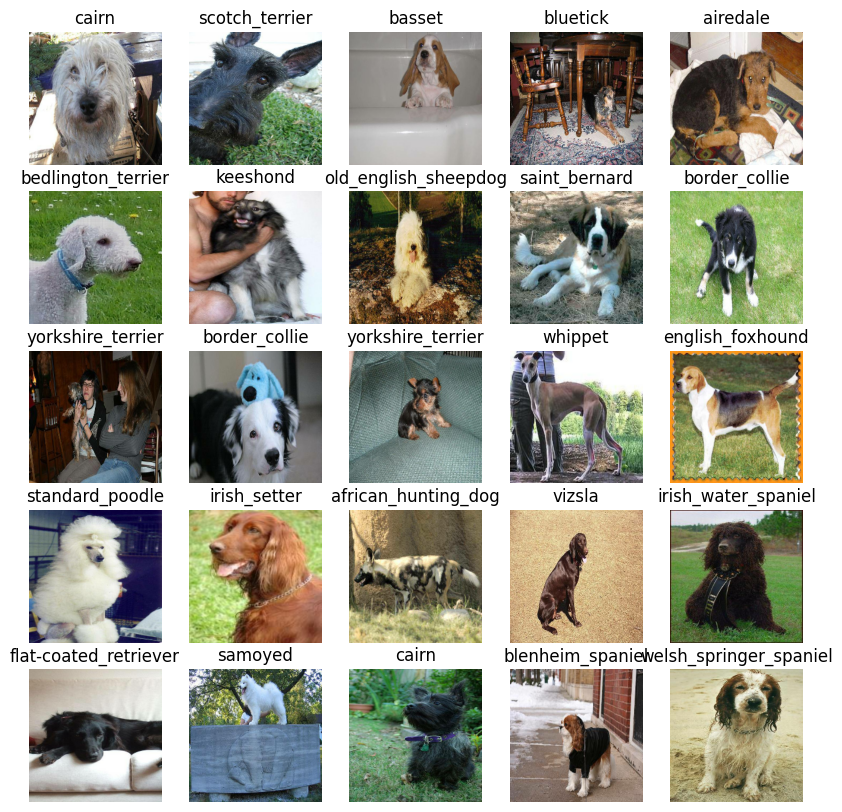

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)


## Creating and training a model

Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.

### Why use a pretrained model?

Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

### How do we choose a model?

Since we know our problem is image classification (classifying different dog breeds), we can navigate the TensorFlow Hub page by our problem domain (image).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, image classification.

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the mobilenet_v2_130_224 model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Let's try it out.

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.

In [ ]:
# Setup inout shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
            #  BATCH, HEIGHT, WIDTH,  COLOUR CHANNELS

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.

In [ ]:
# Cell 1 – THE REAL FIX (run this first!)
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"   # ← THIS IS THE NEW 2025 FLAG

import tensorflow as tf
import tensorflow_hub as hub
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"   # ← THIS MUST BE FIRST

import tensorflow as tf
import tensorflow_hub as hub
import importlib
importlib.reload(tf)
importlib.reload(hub)

# THIS IS THE FEATURE VECTOR VERSION (outputs 1280 features → big Dense layer)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4"

def create_model(n_classes=10):
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL, trainable=False),  # ← 2.2M params frozen, outputs 1280
        tf.keras.layers.Dense(n_classes, activation="softmax")
    ])

    model.build((None, 224, 224, 3))  # ← gives the "multiple" shape you love

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# RUN THIS → YOU GET EXACTLY THE CLASSIC SUMMARY YOU WANT
model = create_model(n_classes=10)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1664)              3766048   
                                                                 
 dense_1 (Dense)             (None, 10)                16650     
                                                                 
Total params: 3782698 (14.43 MB)
Trainable params: 16650 (65.04 KB)
Non-trainable params: 3766048 (14.37 MB)
_________________________________________________________________
